In [16]:
import numpy as np
import pandas as pd

import xarray as xr
import matplotlib.pyplot as plt

import scipy as spy
from scipy.interpolate import griddata

import pickle 

from cartopy import config
import cartopy.crs as ccrs

In [5]:
f = np.loadtxt('HydroData_gamma-n_2785_all_corrected.txt')

In [6]:
Lat = f[:,0]
Lon = f[:,1]
DO = f[:,9]

Lat[Lat > 90] = 0
Lon[Lon > 360] = 0

max(Lon)

360.0

In [7]:
lons = Lon[(Lon < 340) & (Lon > 280) &(Lat < -20) & (Lat > -80)]
lats = Lat[(Lon < 340) & (Lon > 280) &(Lat < -20) & (Lat > -80)]
doxy = DO[(Lon < 340) & (Lon > 280) &(Lat < -20) & (Lat > -80)]
lons

array([283.15 , 288.55 , 284.067, ..., 337.588, 338.658, 339.847])

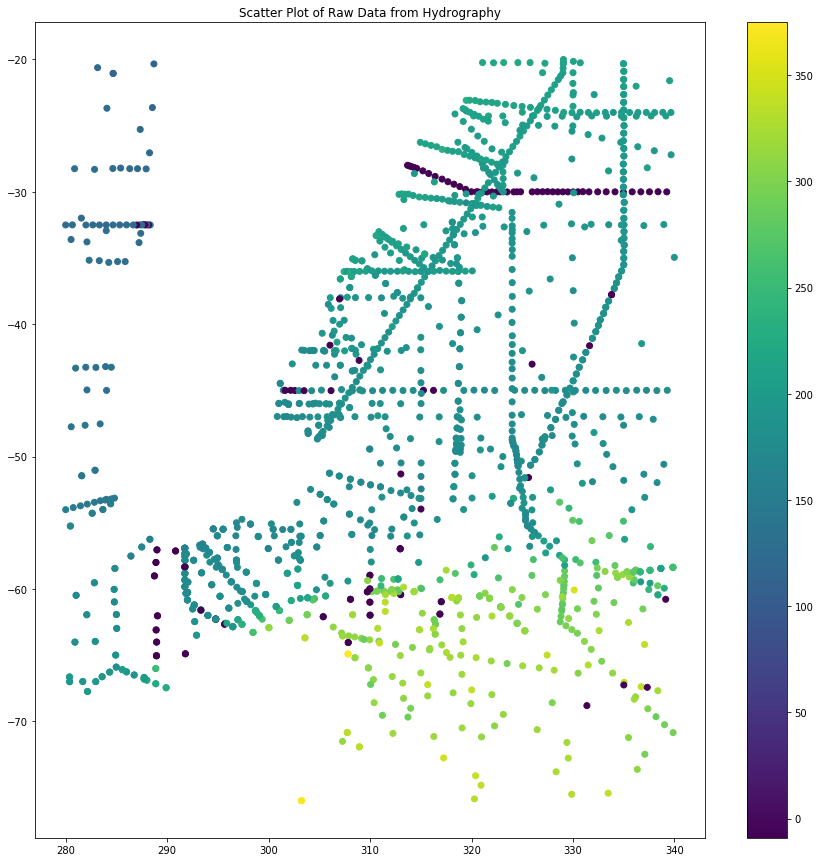

In [13]:
plt.figure(1,(15,15))
im=plt.scatter(lons,lats,c=doxy)
plt.title('Scatter Plot of Raw Data from Hydrography')
cbar=plt.colorbar(im)

In [8]:
#internet/experience says this is the best way to reshape so I can do contourf:

xx = np.linspace(min(lons),max(lons),len(lons));
yy = np.linspace(min(lats),max(lats),len(lats));
[X,Y] = np.meshgrid(xx,yy);
len(xx)

1673

In [33]:
Z = spy.interpolate.griddata((Lon,Lat),DO,(X,Y),method='linear')

## nearest looked SO much better than cubic in terms of getting actual variation out of it
#This is where I've been editing the interpolation method


In [34]:
pickle.dump(Z, open( "DOXY.pckl", "wb" ) )
pickle.dump(X, open( "X.pckl", "wb" ) )
pickle.dump(Y, open( "Y.pckl", "wb" ) )

#created a pickle for each because it takes a long time to run the creation code

In [35]:
f = open('DOXY.pckl', 'rb')
DOXY = pickle.load(f)
f.close()

f = open('X.pckl', 'rb')
X = pickle.load(f)
f.close()

f = open('Y.pckl', 'rb')
Y = pickle.load(f)
f.close()

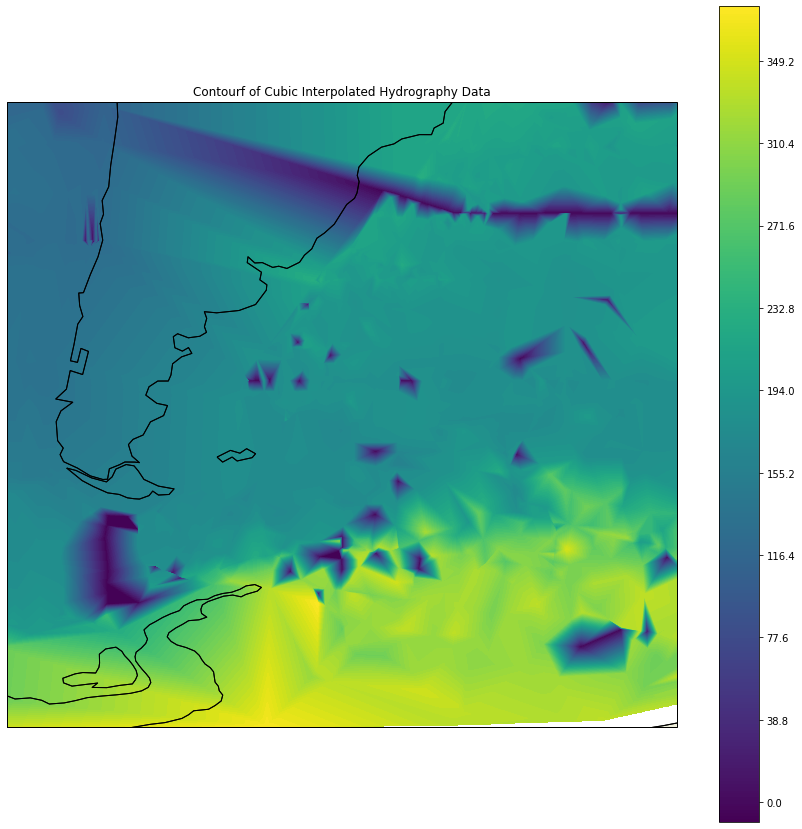

In [36]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(X,Y,DOXY, 100,
             transform=ccrs.PlateCarree())

plt.title('Contourf of Linearly Interpolated Hydrography Data')

ax.coastlines()

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

plt.colorbar(im)

plt.show()